In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Fetching Label Names
labels=list()
path='/content/drive/MyDrive/rpf project/Dataset'
os.listdir(path)
for i in os.listdir(path):
    if len(os.listdir(os.path.join(path,i))) >0:
      labels.append(i)

In [ ]:
labels

['Warrior2', 'Downdog', 'Goddess', 'Tree', 'Plank']

In [ ]:
## Counting the Samples
Total_sample=0
for i in labels:
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Warrior2= 198
Length of :Downdog= 196
Length of :Goddess= 199
Length of :Tree= 198
Length of :Plank= 197
Total Samples:988


In [ ]:
!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
img_size=224     # 224*224
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+'/'+img)):
        if i<300:
            img_file=imread(path+'/'+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 197/197 [00:05<00:00, 35.93it/s]


In [ ]:
X[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

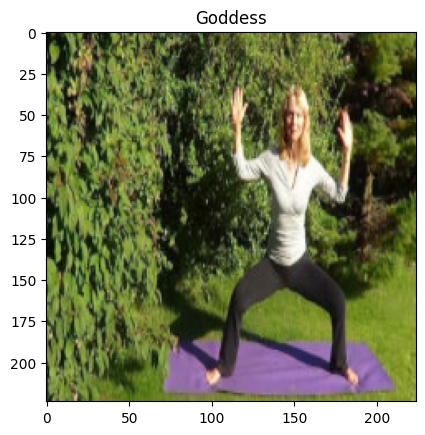

In [ ]:
plt.imshow(X[400])
plt.title(labels[Y[400]])
plt.show()

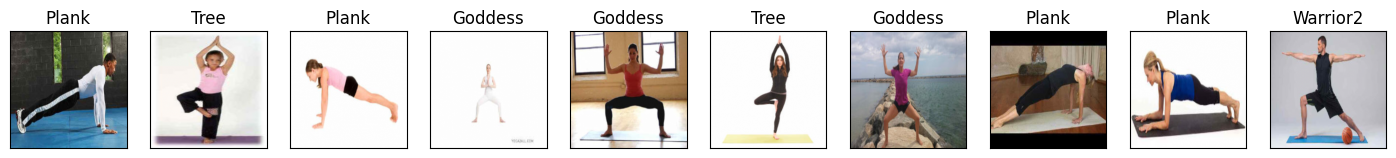

In [ ]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(790, 224, 224, 3),(790,) Testing Data->((198, 224, 224, 3), (198,))


In [ ]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [ ]:
Y_train.shape,Y_test.shape

((790, 5), (198, 5))

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
from time import time
tic=time()
epoch=150
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/150
20/20 [==============================] - 23s 199ms/step - loss: 1.6126 - accuracy: 0.1788 - val_loss: 1.6114 - val_accuracy: 0.1962
Epoch 2/150
20/20 [==============================] - 2s 83ms/step - loss: 1.6088 - accuracy: 0.2120 - val_loss: 1.6179 - val_accuracy: 0.1329
Epoch 3/150
20/20 [==============================] - 2s 81ms/step - loss: 1.5920 - accuracy: 0.3196 - val_loss: 1.2407 - val_accuracy: 0.5253
Epoch 4/150
20/20 [==============================] - 2s 81ms/step - loss: 1.1884 - accuracy: 0.5791 - val_loss: 1.1504 - val_accuracy: 0.5443
Epoch 5/150
20/20 [==============================] - 2s 84ms/step - loss: 0.8208 - accuracy: 0.6788 - val_loss: 1.1017 - val_accuracy: 0.5886
Epoch 6/150
20/20 [==============================] - 2s 86ms/step - loss: 0.6795 - accuracy: 0.7373 - val_loss: 0.9627 - val_accuracy: 0.6456
Epoch 7/150
20/20 [==============================] - 2s 84ms/step - loss: 0.5644 - accuracy: 0.7706 - val_loss: 0.7008 - val_accuracy: 0.7722
Epoc

Text(0.5, 1.0, 'Accuracy')

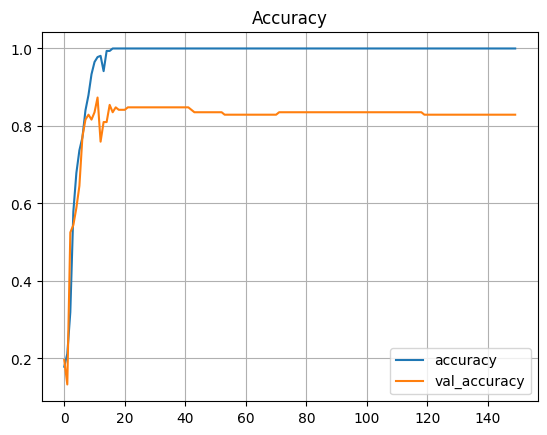

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
model.save('./Simple_CNN_model.h5')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)

7/7 [==============================] - 1s 76ms/step - loss: 1.6843 - accuracy: 0.8737


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 0s 21ms/step
[0 1 1 0 4 2 3 2 3 1 3 2 2 3 1 0 4 3 2 1 2 0 4 1 2 3 3 4 1 0 0 4 4 0 1 2 3
 1 4 3 2 3 3 1 1 1 4 4 3 4 4 2 4 3 0 2 3 3 0 0 1 4 4 4 2 1 4 1 2 1 2 2 2 1
 0 2 1 2 1 1 4 1 0 4 0 4 0 2 4 3 3 4 1 0 2 4 1 0 4 1 0 1 2 2 0 2 3 4 4 0 1
 4 4 0 3 4 4 2 2 3 4 1 0 4 3 4 0 0 3 3 0 2 4 2 3 0 2 3 2 3 3 0 1 1 3 2 3 1
 0 2 1 2 0 4 0 2 3 3 2 0 2 3 0 1 4 1 2 3 3 2 3 1 1 0 2 3 0 2 2 0 2 0 3 2 3
 2 0 1 2 3 0 4 4 4 3 2 1 2]


In [ ]:
Y_test=np.argmax(Y_test,axis=1)

In [ ]:
print(Y_test)

[0 1 1 2 4 2 3 2 3 1 3 3 2 3 4 1 4 3 0 1 2 0 4 1 2 3 3 4 1 0 0 4 4 0 1 0 3
 1 4 3 2 1 0 1 1 1 4 4 3 4 4 2 4 3 0 2 3 3 0 0 1 4 4 4 2 1 4 1 2 1 2 2 2 1
 0 2 1 2 1 2 4 0 0 4 0 4 2 2 4 3 3 4 1 0 2 4 1 2 4 1 0 1 0 2 0 2 3 4 4 3 1
 4 4 0 3 4 4 2 2 3 1 1 0 4 3 4 0 0 3 2 0 2 4 2 3 0 2 3 1 3 3 0 1 1 3 0 3 1
 0 2 1 4 0 4 0 0 3 3 2 0 0 3 3 1 1 1 2 3 3 2 3 1 1 0 2 3 0 2 2 0 2 0 3 2 3
 2 0 1 2 3 0 4 4 4 3 0 1 4]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

[[31  1  7  1  0]
 [ 1 34  1  1  2]
 [ 3  1 35  1  0]
 [ 2  0  1 37  0]
 [ 0  1  2  0 36]]


In [ ]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.92      0.87      0.89        39
           2       0.76      0.88      0.81        40
           3       0.93      0.93      0.93        40
           4       0.95      0.92      0.94        39

    accuracy                           0.87       198
   macro avg       0.88      0.87      0.87       198
weighted avg       0.88      0.87      0.87       198



7/7 [==============================] - 0s 20ms/step


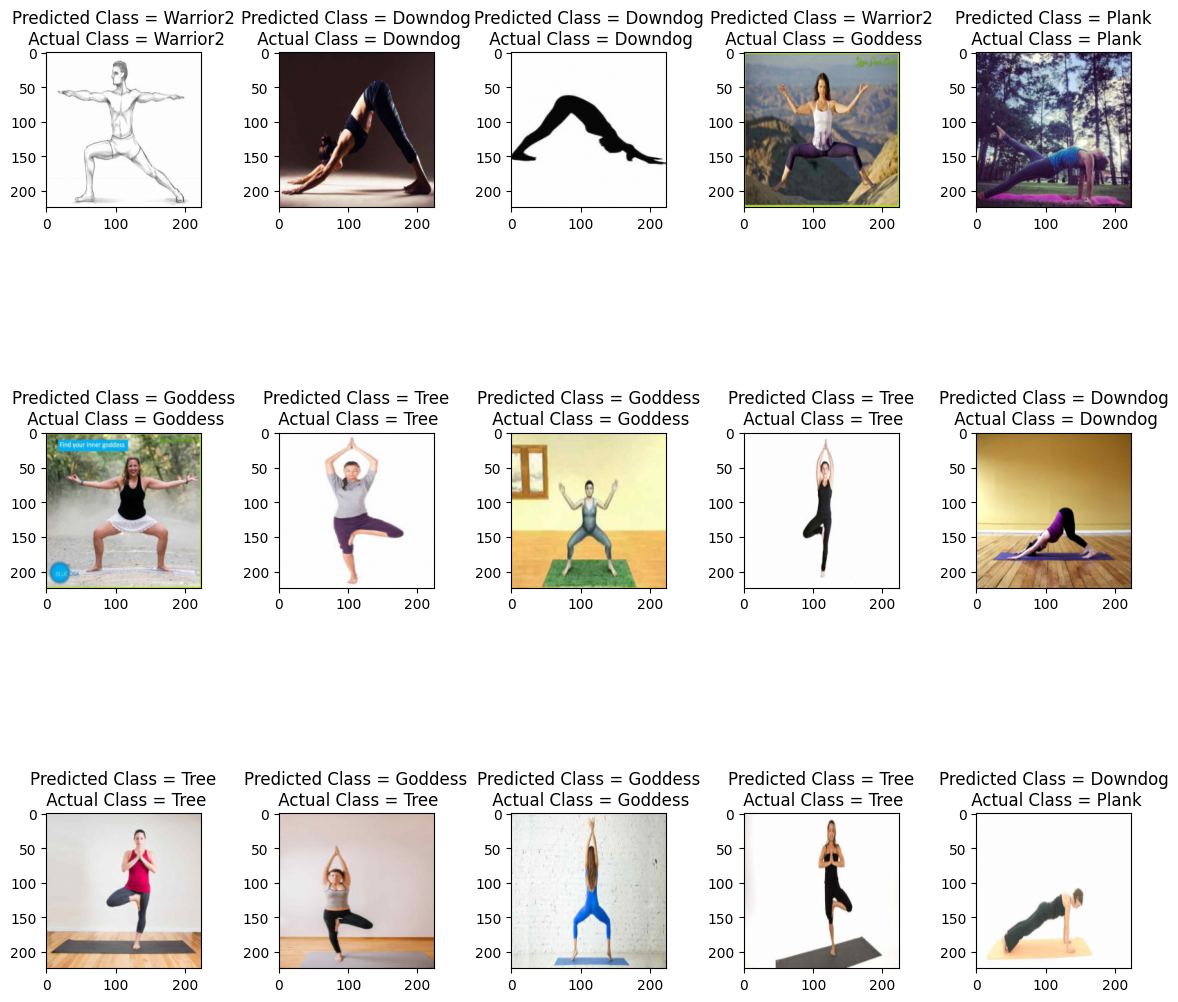

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:

import gradio as gr

In [ ]:

def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  #return {labels[i]: float(prediction[i]) for i in rangrangerangrangeee(5)}
forforfororforforfororfororforor i in range(len(labels)):
    if predictiorangrangee
      return "Predicted Class: "+labels[i]

In [ ]:
image = gr.inputs.Image(shape=(224,224))

gr.Interface(fn=predict_image, inputs=image, outputs='text',title="Yoga Pose Detection").launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


# New section